In [ ]:

# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Machine Learning Models
import xgboost as xgb

# Warnings
import warnings
warnings.filterwarnings("ignore")

print(" All libraries imported successfully!")


 All libraries imported successfully!


In [ ]:
!pip install catboost lightgbm --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def clean_data(df):
    data = df.copy()

    # 1. Convert categorical features to numeric where applicable

    # loan_term: "3 years" -> 3
    data["loan_term"] = data["loan_term"].str.extract('(\d+)').astype(float)

    # job_experience: Map categories to numbers
    data["job_experience"] = data["job_experience"].replace({
        '<5 Years': '2.5',
        '10+ years': '10',
        '6-10 years': '8',
        '5-6 years': '5.5'
    }).fillna('0').astype(float)


    # 2. Handle missing values
    # Numeric columns -> Median imputation
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # Categorical columns -> Mode imputation
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

   # 3. Encode categorical variables
    for col in cat_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

# Use your best XGBoost params from earlier
xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# CatBoost
cat_model = CatBoostClassifier(iterations=500, verbose=0, random_state=42)

# LightGBM
lgbm_model = LGBMClassifier(n_estimators=500, random_state=42)

# Soft voting to average probabilities
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('cat', cat_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'
)

# Train on full dataset
ensemble.fit(X_full, y_full)


[LightGBM] [Info] Number of positive: 22129, number of negative: 71045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 93174, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.237502 -> initscore=-1.166425
[LightGBM] [Info] Start training from score -1.166425


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_con...
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('rf',
                              RandomForestClassifier(n_estimators=300,
                                                     random_state=42)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7a36d5682e10>),
                             ('lgbm',
                              LGBMClassifier(n_estimators=500,
                                             random_state=42))],
                 voting='soft')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/My Drive/Python/Train_set.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/Python/Test_set.csv'

In [ ]:
#Load Dataset
import pandas as pd
train_df = pd.read_csv("/content/drive/My Drive/Python/Train_set.csv")
test_df = pd.read_csv("/content/drive/My Drive/Python/Test_set.csv")

In [ ]:
# Clean datasets
train_cleaned = clean_data(train_df)
test_cleaned = clean_data(test_df)

print("Train shape after cleaning:", train_cleaned.shape)
print("Test shape after cleaning:", test_cleaned.shape)

Train shape after cleaning: (93174, 23)
Test shape after cleaning: (39933, 22)


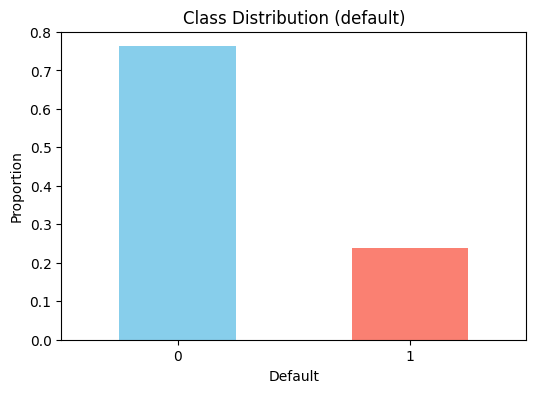

In [ ]:
# Target distribution
plt.figure(figsize=(6,4))
train_df['default'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title('Class Distribution (default)')
plt.xlabel('Default')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


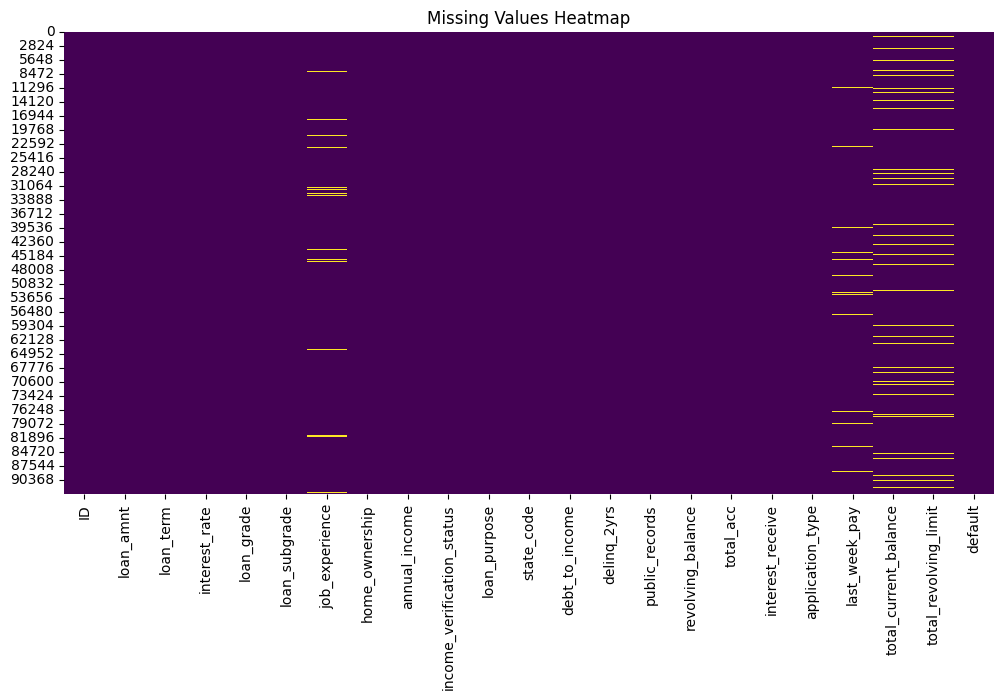

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


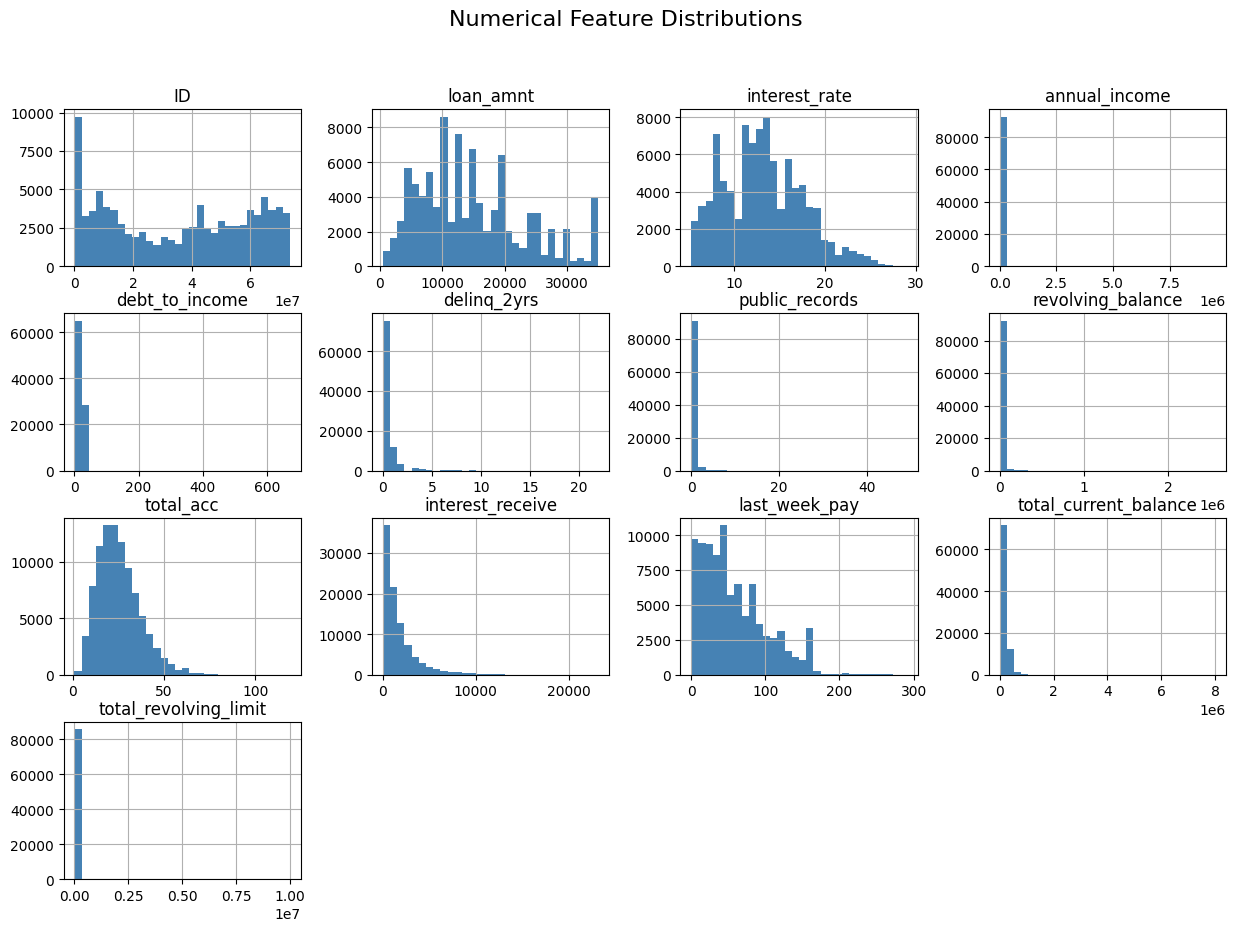

In [ ]:
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
num_cols.remove('default')  # remove target

train_df[num_cols].hist(figsize=(15,10), bins=30, color='steelblue')
plt.suptitle('Numerical Feature Distributions', fontsize=16)
plt.show()


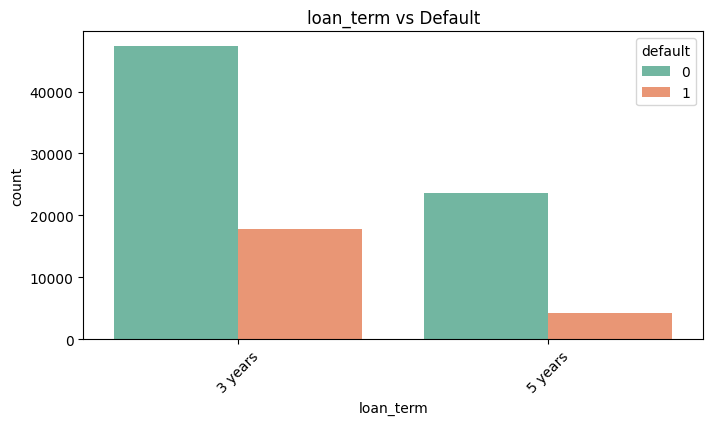

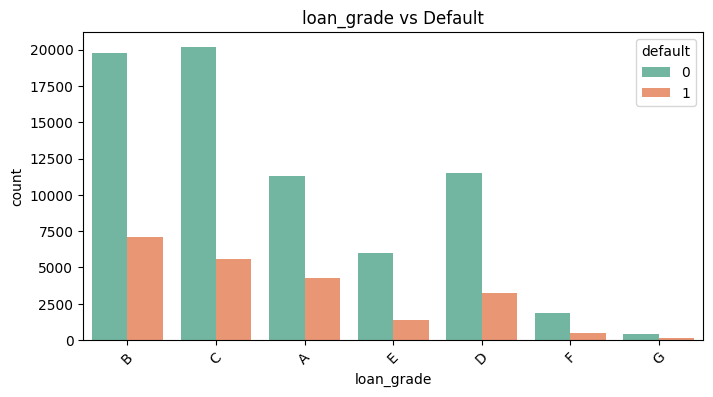

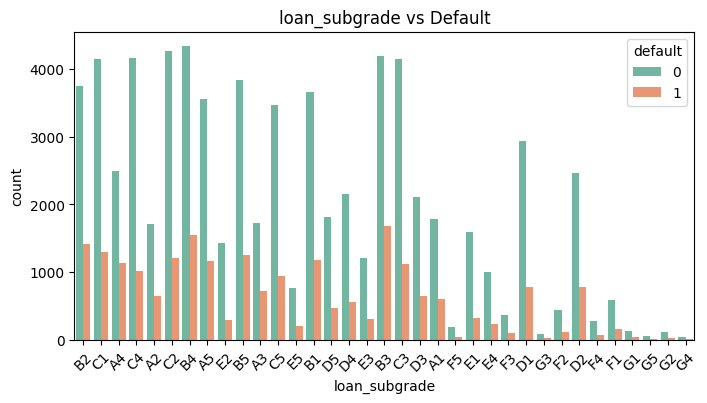

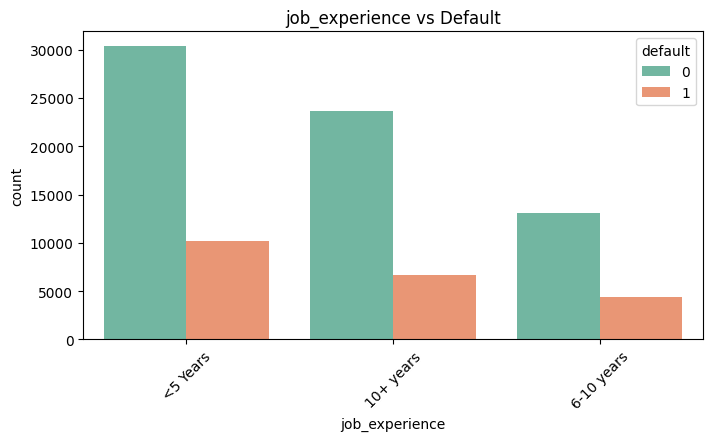

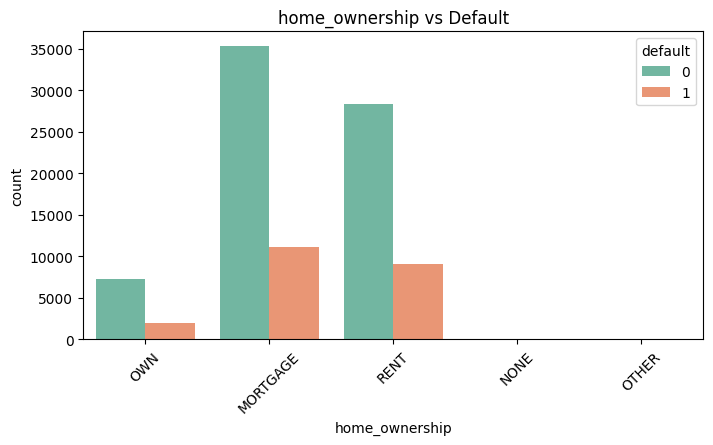

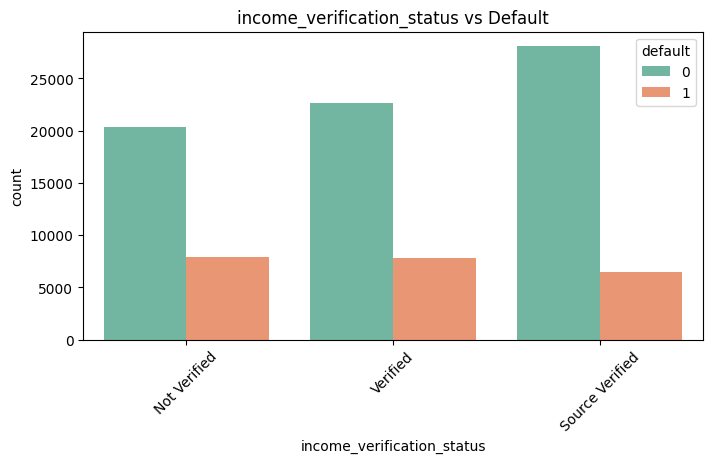

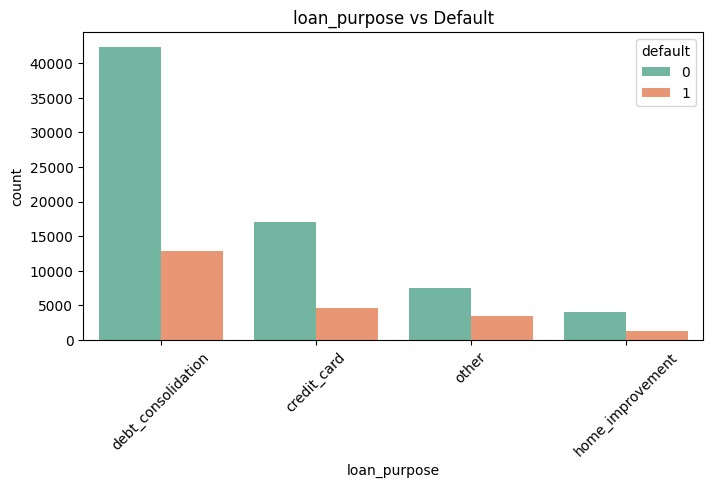

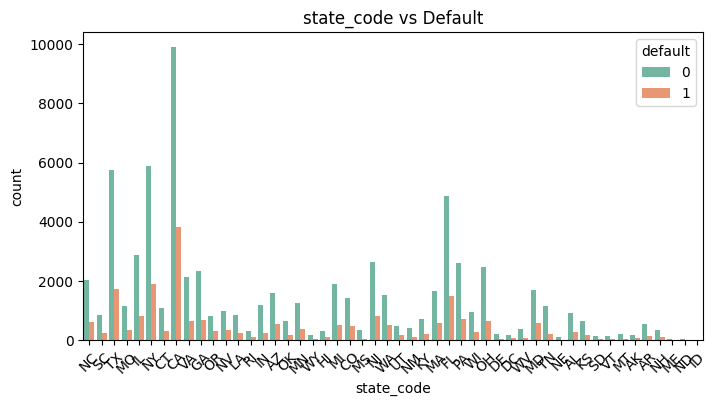

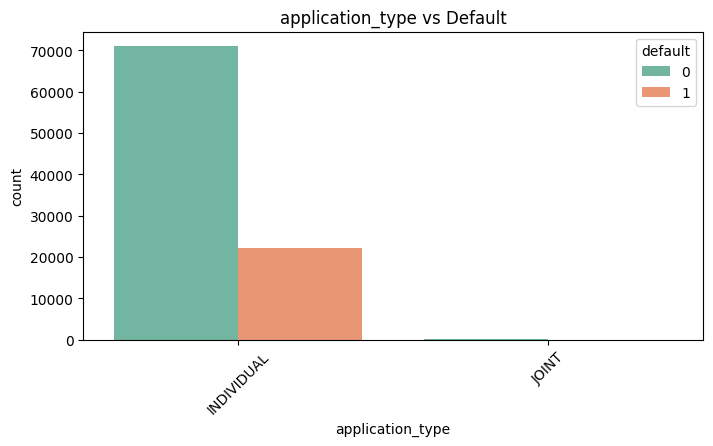

In [ ]:
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=train_df, x=col, hue='default', palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Default')
    plt.show()


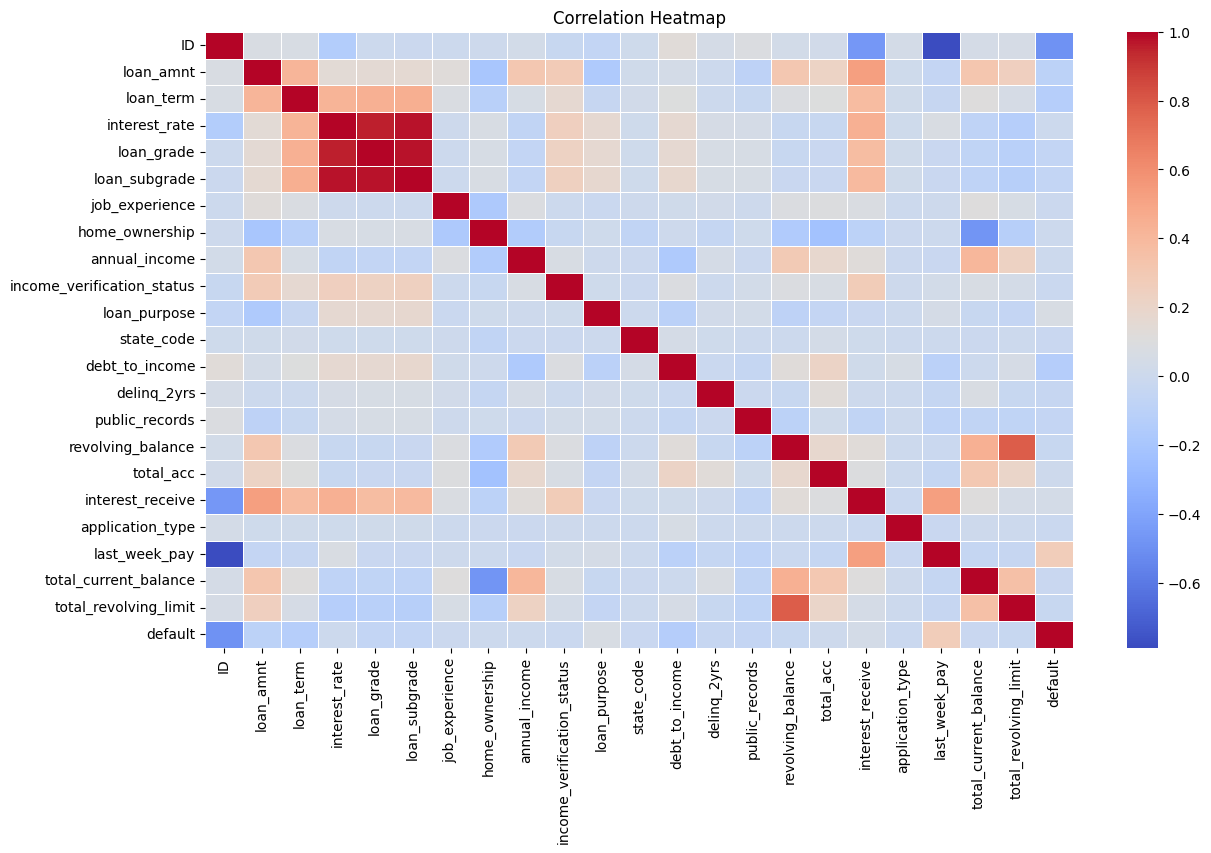

In [ ]:
plt.figure(figsize=(14,8))
corr = train_cleaned.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def feature_engineering(df):
    data = df.copy()

    # 1. Loan to income ratio
    data['loan_to_income'] = data['loan_amnt'] / (data['annual_income'] + 1)

    # 2. Revolving utilization
    data['revolving_utilization'] = data['revolving_balance'] / (data['total_revolving_limit'] + 1)

    # 3. Credit availability
    data['credit_availability'] = data['total_revolving_limit'] - data['revolving_balance']

    # 4. Delinquency rate
    data['delinquency_rate'] = data['delinq_2yrs'] / (data['total_acc'] + 1)

    # 5. Interest bins (categorical)
    data['interest_rate_bin'] = pd.cut(data['interest_rate'], bins=[0,10,15,20,30], labels=['Low','Medium','High','Very High'])

    # Encode the new bin
    le = LabelEncoder()
    data['interest_rate_bin'] = le.fit_transform(data['interest_rate_bin'].astype(str))

    return data

# Apply feature engineering on cleaned data
train_fe = feature_engineering(train_cleaned)
test_fe = feature_engineering(test_cleaned)

print(" Feature engineering complete. New shape:", train_fe.shape)


 Feature engineering complete. New shape: (93174, 28)


In [ ]:
from sklearn.model_selection import train_test_split

X = train_fe.drop(columns=['default', 'ID'])
y = train_fe['default']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)


Train shape: (74539, 26)
Validation shape: (18635, 26)


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (len(y) - sum(y)) / sum(y),
    'random_state': 42
}

model = xgb.XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Validation accuracy
val_preds = model.predict(X_val)
baseline_acc = accuracy_score(y_val, val_preds)
print(f"Baseline Validation Accuracy: {baseline_acc:.4f}")


Baseline Validation Accuracy: 0.8805


In [ ]:
def feature_engineering(df):
    data = df.copy()

    # 1. Loan to income ratio
    data['loan_to_income'] = data['loan_amnt'] / (data['annual_income'] + 1)

    # 2. Revolving utilization
    data['revolving_utilization'] = data['revolving_balance'] / (data['total_revolving_limit'] + 1)

    # 3. Credit availability
    data['credit_availability'] = data['total_revolving_limit'] - data['revolving_balance']

    # 4. Delinquency rate
    data['delinquency_rate'] = data['delinq_2yrs'] / (data['total_acc'] + 1)

    # 5. Interest bins (categorical)
    data['interest_rate_bin'] = pd.cut(
        data['interest_rate'], bins=[0,10,15,20,30],
        labels=['Low','Medium','High','Very High']
    ).astype(str)

    # Encode interest_rate_bin
    le = LabelEncoder()
    data['interest_rate_bin'] = le.fit_transform(data['interest_rate_bin'])

    return data


In [ ]:
train_fe = feature_engineering(train_cleaned)
test_fe = feature_engineering(test_cleaned)

print(" Feature engineering complete. New shape (train):", train_fe.shape)


 Feature engineering complete. New shape (train): (93174, 28)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = train_fe.drop(columns=['default', 'ID'])
y = train_fe['default']

# Train-validation split (80%-20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(" Train shape:", X_train.shape)
print(" Validation shape:", X_val.shape)


 Train shape: (74539, 26)
 Validation shape: (18635, 26)


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score

# ---------------------------
# 1. Train-Validation Split
# ---------------------------
X = train_fe.drop(columns=['default', 'ID'])
y = train_fe['default']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(" Train shape:", X_train.shape)
print(" Validation shape:", X_val.shape)

# ---------------------------
# 2. Train Baseline XGBoost Model
# ---------------------------
xgb_params = {
    'n_estimators': 1000,
    'learning_rate': 0.03,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (len(y) - sum(y)) / sum(y),
    'random_state': 42
}

model = xgb.XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# ---------------------------
# 3. Baseline Validation Accuracy
# ---------------------------
val_preds = model.predict(X_val)
baseline_acc = accuracy_score(y_val, val_preds)
print(f" Baseline Validation Accuracy: {baseline_acc:.4f}")


 Train shape: (74539, 26)
 Validation shape: (18635, 26)
 Baseline Validation Accuracy: 0.8805


In [ ]:
# 1. Retrain model on the entire training data
X_full = train_fe.drop(columns=['default', 'ID'])
y_full = train_fe['default']

final_model = xgb.XGBClassifier(**xgb_params, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_full, y_full)

# 2. Predict on the test dataset
test_X = test_fe.drop(columns=['ID'])
test_probs = final_model.predict_proba(test_X)[:, 1]

# Apply best threshold (0.61)
test_preds = (test_probs >= best_thresh).astype(int)

# 3. Create final submission file
submission = pd.DataFrame({
    'ID': test_fe['ID'],
    'default': test_preds
})

# Save the file
submission.to_csv("Final_Submission.csv", index=False)
print(" Final submission file created: Final_Submission.csv")
submission.head()
def clean_data(df):
    data = df.copy()

    # 1. Convert 'loan_term' to numeric
    data["loan_term"] = data["loan_term"].str.extract('(\d+)').astype(float)

    # 2. Convert 'job_experience' categories to numeric
    data["job_experience"] = data["job_experience"].replace({
        '<5 Years': '2.5',
        '10+ years': '10',
        '6-10 years': '8',
        '5-6 years': '5.5'
    }).fillna('0').astype(float)

    # 3. Handle missing values for numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # 4. Handle missing values & encoding for categorical columns
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

        # Label encode each categorical column
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data


 Final submission file created: Final_Submission.csv


In [ ]:
from sklearn.metrics import accuracy_score

# Predicted probabilities
y_val_probs = model.predict_proba(X_val)[:, 1]

# Search for best threshold
thresholds = np.arange(0.3, 0.7, 0.01)
best_acc, best_thresh = 0, 0.5

for t in thresholds:
    acc = accuracy_score(y_val, (y_val_probs >= t).astype(int))
    if acc > best_acc:
        best_acc, best_thresh = acc, t

print(f" Best Threshold: {best_thresh:.2f} | Accuracy: {best_acc:.4f}")


 Best Threshold: 0.61 | Accuracy: 0.8867


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

y_val_probs = ensemble.predict_proba(X_val)[:, 1]

best_acc = 0
best_thresh = 0.5

for t in np.arange(0.4, 0.6, 0.01):
    acc = accuracy_score(y_val, (y_val_probs >= t).astype(int))
    if acc > best_acc:
        best_acc = acc
        best_thresh = t

print(f"Best Threshold: {best_thresh:.2f} | Validation Accuracy: {best_acc:.4f}")


Best Threshold: 0.40 | Validation Accuracy: 0.9527


In [ ]:
def clean_data(df):
    data = df.copy()

    # 1. Convert loan_term to numeric
    data["loan_term"] = data["loan_term"].str.extract('(\d+)').astype(float)

    # 2. Convert job_experience categories to numeric
    data["job_experience"] = data["job_experience"].replace({
        '<5 Years': '2.5',
        '10+ years': '10',
        '6-10 years': '8',
        '5-6 years': '5.5'
    }).fillna('0').astype(float)

    # 3. Handle missing values for numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # 4. Handle missing values & encode categorical columns
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

        # Label encode each column inside the loop
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=submission)

https://docs.google.com/spreadsheets/d/1sa6GQVFrV_t9BRx0ni17uaD3Llv1rotre4VJo33-0uw/edit#gid=0


In [ ]:
param_grid = {
    'max_depth': [6, 7],
    'min_child_weight': [1, 3],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'learning_rate': [0.03, 0.05],
    'n_estimators': [800, 1000]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=(len(y_full) - sum(y_full)) / sum(y_full),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='accuracy',
    n_iter=6,            # fewer combinations
    cv=3,                # 3-fold CV
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_full, y_full)

# Output the best parameters and accuracy
print(" Best accuracy:", random_search.best_score_)
print(" Best parameters:", random_search.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
 Best accuracy: 0.8777019340159272
 Best parameters: {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
# 1. Retrain the model with best parameters
best_params = random_search.best_params_

final_model = xgb.XGBClassifier(
    **best_params,
    scale_pos_weight=(len(y_full) - sum(y_full)) / sum(y_full),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

final_model.fit(X_full, y_full)

# 2. Threshold tuning on validation split again
y_val_probs = final_model.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.3, 0.7, 0.01)
best_acc, best_thresh = 0, 0.5

for t in thresholds:
    acc = accuracy_score(y_val, (y_val_probs >= t).astype(int))
    if acc > best_acc:
        best_acc, best_thresh = acc, t

print(f" Best Threshold: {best_thresh:.2f} | Validation Accuracy: {best_acc:.4f}")

# 3. Predict test set
test_probs = final_model.predict_proba(test_fe.drop(columns=['ID']))[:, 1]
test_preds = (test_probs >= best_thresh).astype(int)

# 4. Final submission file
submission = pd.DataFrame({
    'ID': test_fe['ID'],
    'default': test_preds
})

submission.to_csv("Final_Submission_Tuned.csv", index=False)
print(" Final submission file saved as Final_Submission_Tuned.csv")
submission.head()
def clean_data(df):
    data = df.copy()

    # 1. Convert loan_term to numeric
    data["loan_term"] = data["loan_term"].str.extract('(\d+)').astype(float)

    # 2. Convert job_experience categories to numeric
    data["job_experience"] = data["job_experience"].replace({
        '<5 Years': '2.5',
        '10+ years': '10',
        '6-10 years': '8',
        '5-6 years': '5.5'
    }).fillna('0').astype(float)

    # 3. Handle missing values for numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # 4. Handle missing values for categorical columns
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

        # Encode categorical columns
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data



 Best Threshold: 0.53 | Validation Accuracy: 0.9548
 Final submission file saved as Final_Submission_Tuned.csv


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=submission)

https://docs.google.com/spreadsheets/d/1FITHjaZeWrAOlnFWH2ZwBSzV3PszxPGv1a9Zjar-UFE/edit#gid=0


In [ ]:
print(submission.columns)
print(submission.shape)


Index(['ID', 'default'], dtype='object')
(39933, 2)


In [ ]:
from google.colab import files
files.download("Final_Submission_Tuned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Predict on test data
test_probs = ensemble.predict_proba(test_fe.drop(columns=['ID']))[:, 1]
test_preds = (test_probs >= best_thresh).astype(int)

# Create final submission
submission = pd.DataFrame({
    'ID': test_fe['ID'],
    'default': test_preds
})

submission.to_csv("Final_Ensemble_Submission.csv", index=False)
print(" Final ensemble submission saved as Final_Ensemble_Submission.csv")
submission.head()
def clean_data(df):
    data = df.copy()

    # 1. Convert loan_term to numeric
    data["loan_term"] = data["loan_term"].str.extract('(\d+)').astype(float)

    # 2. Convert job_experience categories to numeric
    data["job_experience"] = data["job_experience"].replace({
        '<5 Years': '2.5',
        '10+ years': '10',
        '6-10 years': '8',
        '5-6 years': '5.5'
    }).fillna('0').astype(float)

    # 3. Handle missing values for numerical columns
    num_cols = data.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        data[col] = data[col].fillna(data[col].median())

    # 4. Handle missing values & encode categorical columns
    cat_cols = data.select_dtypes(include=['object']).columns
    for col in cat_cols:
        data[col] = data[col].fillna(data[col].mode()[0])

        # Label encode each column inside the loop
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data



 Final ensemble submission saved as Final_Ensemble_Submission.csv


In [ ]:
print(submission.columns)
print(submission.shape)

Index(['ID', 'default'], dtype='object')
(39933, 2)


In [ ]:
from google.colab import files
files.download("Final_Submission_Tuned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>